In [1]:
import numpy as np
import matplotlib.pyplot as plt

from params import MetabolicNetwork

In [6]:
# Create time points (6 hours = 360 minutes)
t = np.linspace(0, 180, 1000)

# SMM-based protein intake (130g)
network_smm = MetabolicNetwork()
network_smm.set_initial_concentrations("smm_based")
network_smm.simulate(t)

# Conventional protein intake (200g)
network_conv = MetabolicNetwork()
network_conv.set_initial_concentrations("conventional")
network_conv.simulate(t)

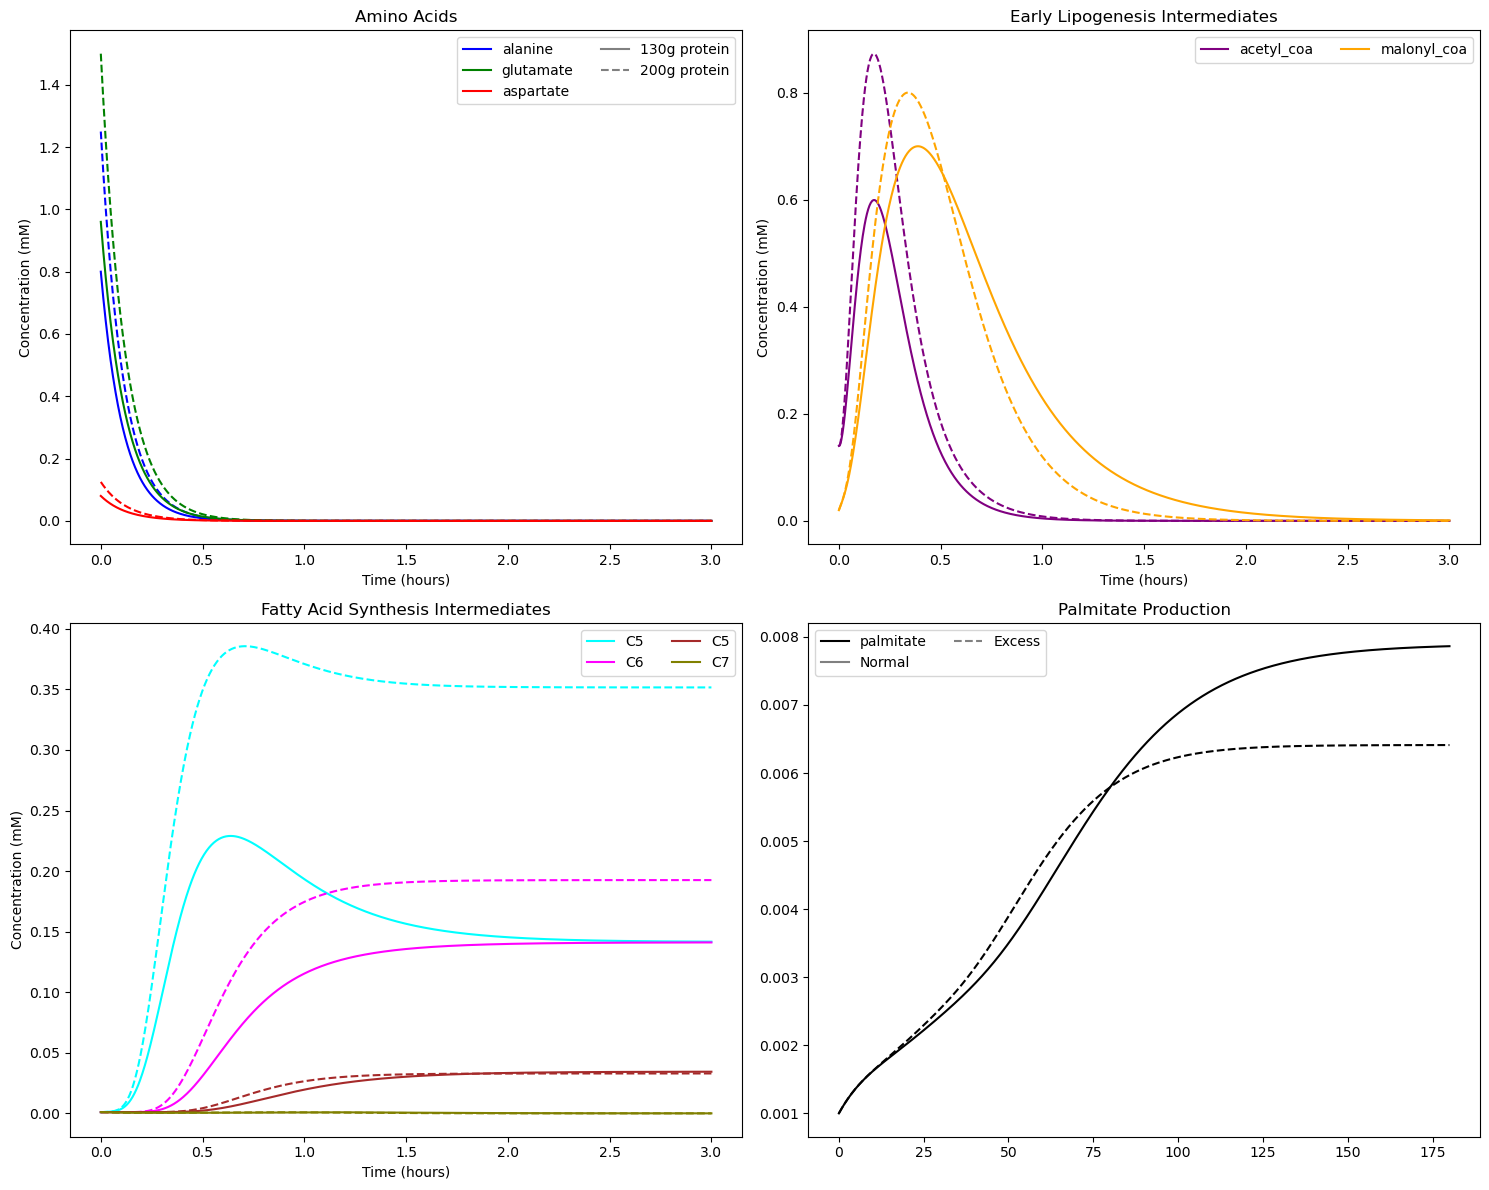

In [7]:
# Plot comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define colors for metabolites
color_dict = {
    'alanine': 'blue',
    'glutamate': 'green',
    'aspartate': 'red',
    'acetyl_coa': 'purple',
    'malonyl_coa': 'orange',
    'butyryl_coa': 'cyan',
    'octanoyl_coa': 'magenta',
    'lauroyl_coa': 'brown',
    'palmitoyl_coa': 'olive',
    'palmitate': 'black'
}

# Plot amino acids
for met_name in ['alanine', 'glutamate', 'aspartate']:
    color = color_dict[met_name]
    axes[0,0].plot(t/60, network_smm.concentration_history[met_name], 
                    label=met_name, color=color)
    axes[0,0].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[0,0].set_title('Amino Acids')
axes[0,0].set_xlabel('Time (hours)')
axes[0,0].set_ylabel('Concentration (mM)')
# Add scenario legend
axes[0,0].plot([], [], color='gray', label='130g protein', linestyle='-')
axes[0,0].plot([], [], color='gray', label='200g protein', linestyle='--')
axes[0,0].legend(ncol=2)

# Plot early lipogenesis intermediates
for met_name in ['acetyl_coa', 'malonyl_coa']:
    color = color_dict[met_name]
    axes[0,1].plot(t/60, network_smm.concentration_history[met_name], 
                    label=met_name, color=color)
    axes[0,1].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[0,1].set_title('Early Lipogenesis Intermediates')
axes[0,1].set_xlabel('Time (hours)')
axes[0,1].set_ylabel('Concentration (mM)')
axes[0,1].legend(ncol=2)

# Plot FAS intermediates
fas_intermediates = ['butyryl_coa', 'octanoyl_coa', 'lauroyl_coa', 'palmitoyl_coa']
for met_name in fas_intermediates:
    color = color_dict[met_name]
    label = f'C{len(met_name.split("_")[0])-2}'  # Convert name to carbon number
    axes[1,0].plot(t/60, network_smm.concentration_history[met_name], 
                    label=label, color=color)
    axes[1,0].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[1,0].set_title('Fatty Acid Synthesis Intermediates')
axes[1,0].set_xlabel('Time (hours)')
axes[1,0].set_ylabel('Concentration (mM)')
axes[1,0].legend(ncol=2)

# Plot final product (palmitate)
color = color_dict['palmitate']
axes[1,1].plot(t, network_smm.concentration_history['palmitate'], 
                label='palmitate', color=color)
axes[1,1].plot(t, network_conv.concentration_history['palmitate'], 
                linestyle='--', color=color)
axes[1,1].set_title('Palmitate Production')
# Add scenario legend
axes[1,1].plot([], [], color='gray', label='Normal', linestyle='-')
axes[1,1].plot([], [], color='gray', label='Excess', linestyle='--')
axes[1,1].legend(ncol=2)

plt.tight_layout()
plt.show()